In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score
from sklearn.manifold import TSNE
from sklearn.neighbors import NearestNeighbors
import seaborn as sns
from sklearn.datasets import make_blobs
from sklearn.cluster import DBSCAN
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage

In [2]:
df = pd.read_csv('data/single_genre_artists.csv')
df.head()

,id_songs,name_song,popularity_songs,duration_ms,explicit,id_artists,release_date,danceability,energy,key,...,acousticness,instrumentalness,liveness,valence,tempo,time_signature,followers,genres,name_artists,popularity_artists
0,0IA0Hju8CAgYfV1hwhidBH,La Java,0,161427,0,4AxgXfD7ISvJSTObqm4aIE,1922,0.563,0.184,4,...,0.993,0.000016,0.325,0.654,133.088,3,5078.0,['vintage chanson'],Mistinguett,22
1,1b8HZQCqcqwbzlA1jRTp6E,En Douce,0,223440,0,4AxgXfD7ISvJSTObqm4aIE,1922,0.427,0.180,10,...,0.989,0.000000,0.128,0.431,78.459,3,5078.0,['vintage chanson'],Mistinguett,22
2,5d5gQxHwYovxR5pqETOIAa,J'en Ai Marre,0,208267,0,4AxgXfD7ISvJSTObqm4aIE,1922,0.511,0.206,0,...,0.995,0.000000,0.418,0.481,70.443,4,5078.0,['vintage chanson'],Mistinguett,22
3,1EO65UEEPfy7CR0NK2sDxy,Ils n'ont pas ca,0,161933,0,4AxgXfD7ISvJSTObqm4aIE,1924,0.676,0.467,9,...,0.991,0.000000,0.219,0.726,129.775,4,5078.0,['vintage chanson'],Mistinguett,22
4,6a58gXSgqbIsXUhVZ6ZJqe,La belote,0,167973,0,4AxgXfD7ISvJSTObqm4aIE,1924,0.650,0.298,9,...,0.991,0.000000,0.373,0.844,75.950,4,5078.0,['vintage chanson'],Mistinguett,22


In [3]:
df_copy = df

In [4]:
df_copy

,id_songs,name_song,popularity_songs,duration_ms,explicit,id_artists,release_date,danceability,energy,key,...,acousticness,instrumentalness,liveness,valence,tempo,time_signature,followers,genres,name_artists,popularity_artists
0,0IA0Hju8CAgYfV1hwhidBH,La Java,0,161427,0,4AxgXfD7ISvJSTObqm4aIE,1922,0.563,0.1840,4,...,0.993,0.000016,0.3250,0.654,133.088,3,5078.0,['vintage chanson'],Mistinguett,22
1,1b8HZQCqcqwbzlA1jRTp6E,En Douce,0,223440,0,4AxgXfD7ISvJSTObqm4aIE,1922,0.427,0.1800,10,...,0.989,0.000000,0.1280,0.431,78.459,3,5078.0,['vintage chanson'],Mistinguett,22
2,5d5gQxHwYovxR5pqETOIAa,J'en Ai Marre,0,208267,0,4AxgXfD7ISvJSTObqm4aIE,1922,0.511,0.2060,0,...,0.995,0.000000,0.4180,0.481,70.443,4,5078.0,['vintage chanson'],Mistinguett,22
3,1EO65UEEPfy7CR0NK2sDxy,Ils n'ont pas ca,0,161933,0,4AxgXfD7ISvJSTObqm4aIE,1924,0.676,0.4670,9,...,0.991,0.000000,0.2190,0.726,129.775,4,5078.0,['vintage chanson'],Mistinguett,22
4,6a58gXSgqbIsXUhVZ6ZJqe,La belote,0,167973,0,4AxgXfD7ISvJSTObqm4aIE,1924,0.650,0.2980,9,...,0.991,0.000000,0.3730,0.844,75.950,4,5078.0,['vintage chanson'],Mistinguett,22
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95832,44r4zta6P9flkhKaVnbsvG,Freaks,70,174800,0,14Y3trk7LaslSFTk1G35rx,2019-02-25,0.674,0.5680,1,...,0.116,0.000000,0.1650,0.640,166.107,4,16057.0,['alt z'],Jordan Clarke,56
95833,0MmaEacabpK8Yp3Mdeo5uY,下雨天,50,265846,0,5VGgFE9nPgMfEnYiPT5J2B,2020-02-25,0.528,0.6730,4,...,0.143,0.000000,0.0989,0.297,130.066,4,929.0,['chinese viral pop'],芝麻,36
95834,1dKxf4Ht2SsKLyXfSDJAgy,The Cutest Puppy,67,82500,0,7vgGpuiXdNlCmc994PlMlz,2020-10-30,0.609,0.0172,8,...,0.996,0.973000,0.1080,0.890,68.619,4,23.0,['instrumental lullaby'],Laureen Conrad,52
95835,0SjsIzJkZfDU7wlcdklEFR,John Brown's Song,66,185250,0,4MxqhahGRT4BPz1PilXGeu,2020-03-20,0.562,0.0331,1,...,0.996,0.961000,0.1110,0.386,63.696,3,91.0,['instrumental lullaby'],Gregory Oberle,55


In [5]:
df_copy.columns

Index(['id_songs', 'name_song', 'popularity_songs', 'duration_ms', 'explicit',
       'id_artists', 'release_date', 'danceability', 'energy', 'key',
       'loudness', 'mode', 'speechiness', 'acousticness', 'instrumentalness',
       'liveness', 'valence', 'tempo', 'time_signature', 'followers', 'genres',
       'name_artists', 'popularity_artists'],
      dtype='object')

In [6]:
df_copy = df_copy.drop(['name_song', 'name_artists', 'id_songs'], axis=1)


In [7]:
df_copy.columns

Index(['popularity_songs', 'duration_ms', 'explicit', 'id_artists',
       'release_date', 'danceability', 'energy', 'key', 'loudness', 'mode',
       'speechiness', 'acousticness', 'instrumentalness', 'liveness',
       'valence', 'tempo', 'time_signature', 'followers', 'genres',
       'popularity_artists'],
      dtype='object')

In [8]:
df_copy.describe()

,popularity_songs,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,followers,popularity_artists
count,95837.000000,9.583700e+04,95837.000000,95837.000000,95837.000000,95837.000000,95837.000000,95837.000000,95837.000000,95837.000000,95837.000000,95837.000000,95837.000000,95837.000000,95837.000000,9.583700e+04,95837.000000
mean,26.066394,2.087320e+05,0.029644,0.586853,0.541083,5.196782,-10.157862,0.648069,0.168832,0.458989,0.082145,0.224916,0.574281,117.539870,3.851362,1.979919e+05,42.819329
std,16.254133,1.177526e+05,0.169604,0.155422,0.236304,3.534923,4.748798,0.477575,0.275417,0.330416,0.232440,0.185829,0.248126,30.190399,0.544406,7.807520e+05,20.897833
min,0.000000,6.373000e+03,0.000000,0.000000,0.000020,0.000000,-50.174000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000
25%,13.000000,1.573330e+05,0.000000,0.488000,0.365000,2.000000,-12.723000,0.000000,0.034100,0.133000,0.000000,0.100000,0.378000,94.829000,4.000000,2.563000e+03,28.000000
50%,26.000000,2.040000e+05,0.000000,0.605000,0.542000,5.000000,-9.397000,1.000000,0.046200,0.453000,0.000004,0.149000,0.589000,116.595000,4.000000,1.595600e+04,40.000000
75%,37.000000,2.502670e+05,0.000000,0.700000,0.727000,8.000000,-6.692000,1.000000,0.103000,0.759000,0.001300,0.302000,0.780000,135.975000,4.000000,8.495100e+04,56.000000
max,98.000000,4.800118e+06,1.000000,0.991000,1.000000,11.000000,5.376000,1.000000,0.968000,0.996000,1.000000,0.997000,1.000000,239.906000,5.000000,2.802643e+07,95.000000


In [9]:
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 95837 entries, 0 to 95836
Data columns (total 20 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   popularity_songs    95837 non-null  int64  
 1   duration_ms         95837 non-null  int64  
 2   explicit            95837 non-null  int64  
 3   id_artists          95837 non-null  object 
 4   release_date        95837 non-null  object 
 5   danceability        95837 non-null  float64
 6   energy              95837 non-null  float64
 7   key                 95837 non-null  int64  
 8   loudness            95837 non-null  float64
 9   mode                95837 non-null  int64  
 10  speechiness         95837 non-null  float64
 11  acousticness        95837 non-null  float64
 12  instrumentalness    95837 non-null  float64
 13  liveness            95837 non-null  float64
 14  valence             95837 non-null  float64
 15  tempo               95837 non-null  float64
 16  time

In [10]:
df_copy = df_copy.drop(['id_artists', 'release_date', 'genres'], axis=1)


In [11]:
standard_scaler = StandardScaler()
df_standard_scaled = standard_scaler.fit_transform(df_copy)
df_standard_scaled = pd.DataFrame(df_standard_scaled, columns=df_copy.columns)
df_standard_scaled.head()

,popularity_songs,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,followers,popularity_artists
0,-1.603686,-0.401735,-0.174785,-0.153476,-1.511128,-0.338561,-0.757909,0.736916,-0.427109,1.616187,-0.353338,0.538584,0.321287,0.515005,-1.563846,-0.247089,-0.996249
1,-1.603686,0.124906,-0.174785,-1.028518,-1.528056,1.358797,-1.098629,0.736916,-0.369741,1.604081,-0.353405,-0.521537,-0.577455,-1.294487,-1.563846,-0.247089,-0.996249
2,-1.603686,-0.003949,-0.174785,-0.488051,-1.418027,-1.470134,-1.127899,0.736916,-0.398062,1.622240,-0.353405,1.039046,-0.375943,-1.560003,0.273029,-0.247089,-0.996249
3,-1.603686,-0.397437,-0.174785,0.573581,-0.313510,1.075904,-0.470677,-1.357007,-0.013914,1.610134,-0.353405,-0.031836,0.611464,0.405268,0.273029,-0.247089,-0.996249
4,-1.603686,-0.346143,-0.174785,0.406294,-1.028695,1.075904,-0.768227,0.736916,-0.111948,1.610134,-0.353405,0.796887,1.087031,-1.377593,0.273029,-0.247089,-0.996249


In [12]:
minmax_scaler = MinMaxScaler()
df_minmax_scaled = minmax_scaler.fit_transform(df_copy)
df_minmax_scaled = pd.DataFrame(df_minmax_scaled, columns=df_copy.columns)
df_minmax_scaled

,popularity_songs,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,followers,popularity_artists
0,0.000000,0.032345,0.0,0.568113,0.183984,0.363636,0.655572,1.0,0.052893,0.996988,0.000016,0.325978,0.654,0.554751,0.6,1.811861e-04,0.231579
1,0.000000,0.045281,0.0,0.430878,0.179984,0.909091,0.626445,1.0,0.069215,0.992972,0.000000,0.128385,0.431,0.327041,0.6,1.811861e-04,0.231579
2,0.000000,0.042116,0.0,0.515641,0.205984,0.000000,0.623942,1.0,0.061157,0.998996,0.000000,0.419258,0.481,0.293628,0.8,1.811861e-04,0.231579
3,0.000000,0.032451,0.0,0.682139,0.466989,0.818182,0.680126,0.0,0.170455,0.994980,0.000000,0.219659,0.726,0.540941,0.8,1.811861e-04,0.231579
4,0.000000,0.033711,0.0,0.655903,0.297986,0.818182,0.654689,1.0,0.142562,0.994980,0.000000,0.374122,0.844,0.316582,0.8,1.811861e-04,0.231579
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95832,0.714286,0.035135,0.0,0.680121,0.567991,0.090909,0.788803,1.0,0.042149,0.116466,0.000000,0.165496,0.640,0.692384,0.8,5.729234e-04,0.589474
95833,0.510204,0.054127,0.0,0.532795,0.672994,0.363636,0.837714,1.0,0.032438,0.143574,0.000000,0.099198,0.297,0.542154,0.8,3.314728e-05,0.378947
95834,0.683673,0.015880,0.0,0.614531,0.017181,0.727273,0.388857,1.0,0.121901,1.000000,0.973000,0.108325,0.890,0.286025,0.8,8.206539e-07,0.547368
95835,0.673469,0.037315,0.0,0.567104,0.033081,0.090909,0.443258,1.0,0.106405,1.000000,0.961000,0.111334,0.386,0.265504,0.6,3.246935e-06,0.578947


In [13]:
df_scaled = pd.read_csv("data/single_genre_artists.csv")
features = [
    'danceability', 'energy', 'loudness', 'speechiness',
    'acousticness', 'instrumentalness', 'liveness',
    'valence', 'tempo', 'duration_ms'
]

X = df_scaled[features]

In [14]:
# pca = PCA(n_components=2)
# pca_result = pca.fit_transform(X)

# df_scaled['pca1'] = pca_result[:, 0]
# df_scaled['pca2'] = pca_result[:, 1]

# plt.figure(figsize=(8,6))
# sns.scatterplot(
#     x="pca1", y="pca2",
#     hue="cluster", data=df_scaled,
#     palette="tab10", s=60, alpha=0.8
# )
# plt.title("Clusters Visualized with PCA")
# plt.show()

# print("Explained Variance Ratio:", pca.explained_variance_ratio_)

# tsne = TSNE(n_components=2, random_state=42, perplexity=30, learning_rate=200)
# tsne_result = tsne.fit_transform(X)

# df_scaled['tsne1'] = tsne_result[:, 0]
# df_scaled['tsne2'] = tsne_result[:, 1]

# plt.figure(figsize=(8,6))
# sns.scatterplot(
#     x="tsne1", y="tsne2",
#     hue="cluster", data=df_scaled,
#     palette="tab10", s=60, alpha=0.8
# )
# plt.title("Clusters Visualized with t-SNE")
# plt.show()

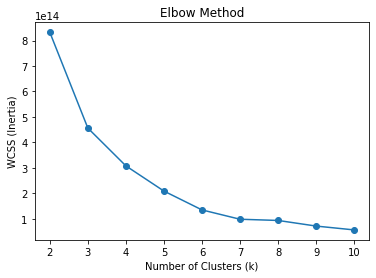

In [15]:
wcss = []
K = range(2, 11)

for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X)  # X = scaled features
    wcss.append(kmeans.inertia_)

plt.plot(K, wcss, marker='o')
plt.title("Elbow Method")
plt.xlabel("Number of Clusters (k)")
plt.ylabel("WCSS (Inertia)")
plt.show()


In [16]:
# for k in [3, 4, 5, 6]:
#     kmeans = KMeans(n_clusters=k, random_state=42)
#     labels = kmeans.fit_predict(X)
#     score = silhouette_score(X, labels)
#     print(f"k={k}, Silhouette Score = {score:.3f}")
kmeans = KMeans(n_clusters=5, random_state=42)
labels = kmeans.fit_predict(X)
score = silhouette_score(X, labels)
print(f"k={k}, Silhouette Score = {score:.3f}")


k=10, Silhouette Score = 0.548


In [17]:
best_k = 5  # since silhouette is best here
kmeans = KMeans(n_clusters=best_k, random_state=42)
df_scaled['cluster'] = kmeans.fit_predict(X)


In [18]:
cluster_summary = df_scaled.groupby("cluster")[features].mean()
print(cluster_summary)


         danceability    energy   loudness  speechiness  acousticness  \
cluster                                                                 
0            0.618508  0.474165 -12.155381     0.438332      0.569255   
1            0.548614  0.572954  -9.717197     0.075992      0.380266   
2            0.512168  0.411577 -15.384100     0.440351      0.664777   
3            0.583742  0.562474  -9.370848     0.073970      0.430892   
4            0.425266  0.617858 -13.433813     0.228712      0.364277   

         instrumentalness  liveness   valence       tempo   duration_ms  
cluster                                                                  
0                0.077559  0.308723  0.607164  110.084702  1.043456e+05  
1                0.117224  0.200596  0.491580  120.067401  3.348481e+05  
2                0.171463  0.382227  0.422997  104.480552  1.273969e+06  
3                0.074056  0.193788  0.583179  120.201926  2.136868e+05  
4                0.341443  0.332884  0.24918

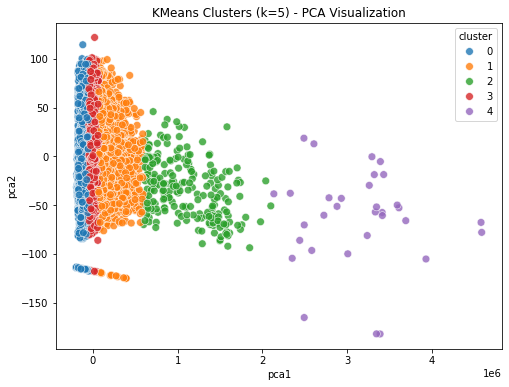

In [19]:
pca = PCA(n_components=2)
pca_result = pca.fit_transform(X)

df_scaled['pca1'] = pca_result[:, 0]
df_scaled['pca2'] = pca_result[:, 1]

plt.figure(figsize=(8,6))
sns.scatterplot(
    x="pca1", y="pca2", hue="cluster", 
    data=df_scaled, palette="tab10", s=60, alpha=0.8
)
plt.title(f"KMeans Clusters (k={best_k}) - PCA Visualization")
plt.show()


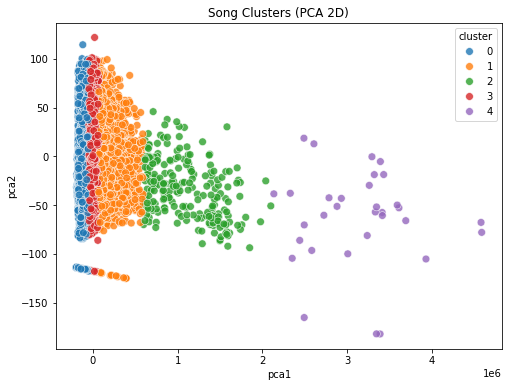

In [20]:
pca = PCA(n_components=3)
pca_result = pca.fit_transform(X)

df_scaled['pca1'] = pca_result[:, 0]
df_scaled['pca2'] = pca_result[:, 1]

plt.figure(figsize=(8,6))
sns.scatterplot(
    data=df_scaled, x="pca1", y="pca2", hue="cluster", 
    palette="tab10", s=60, alpha=0.8
)
plt.title("Song Clusters (PCA 2D)")
plt.show()


DBSCAN found 295 clusters (with -1 = noise).
Silhouette Score (DBSCAN): -0.9685170726684373


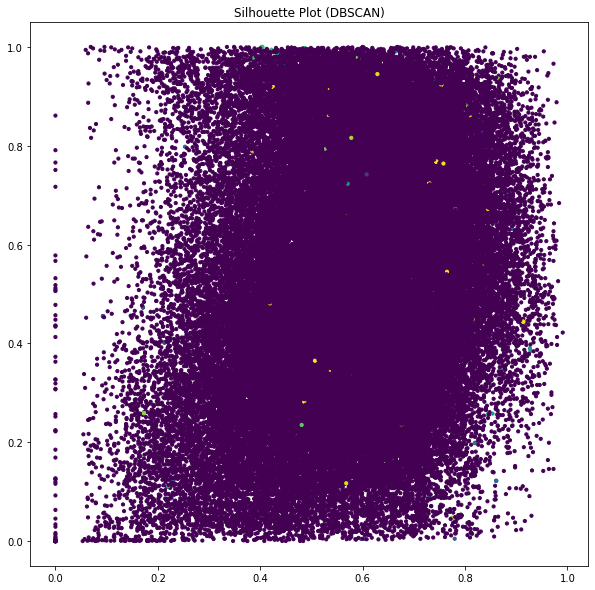

DBSCAN found 295 clusters (with -1 = noise).
Silhouette Score (DBSCAN): -0.9685170726684373


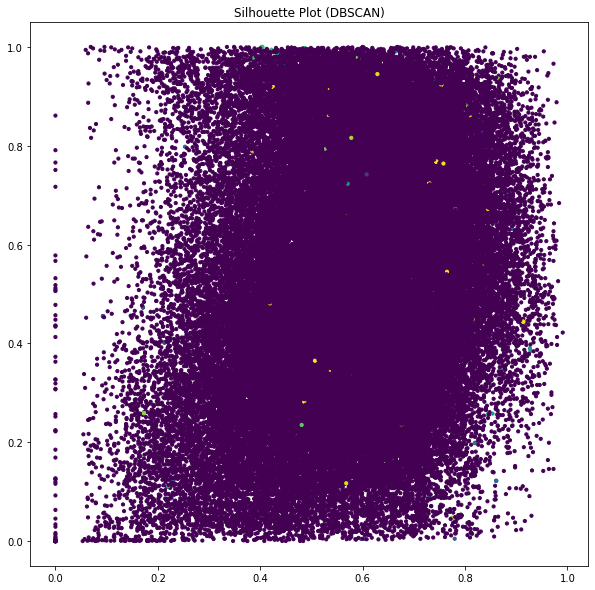

DBSCAN found 295 clusters (with -1 = noise).
Silhouette Score (DBSCAN): -0.9685170726684373


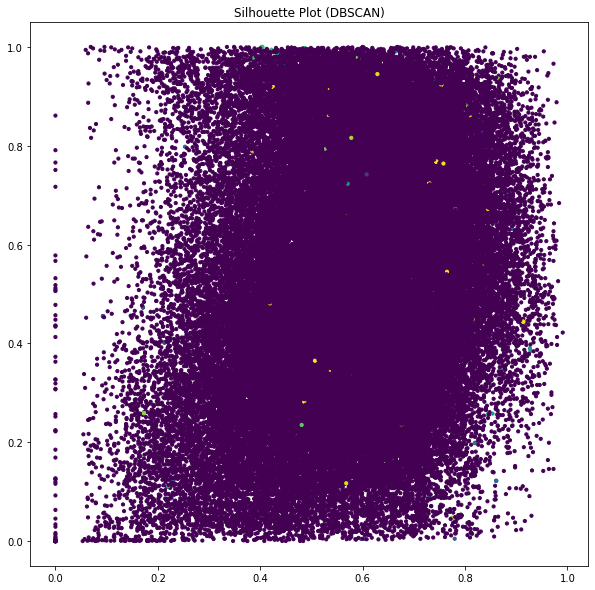

DBSCAN found 295 clusters (with -1 = noise).
Silhouette Score (DBSCAN): -0.9685170726684373


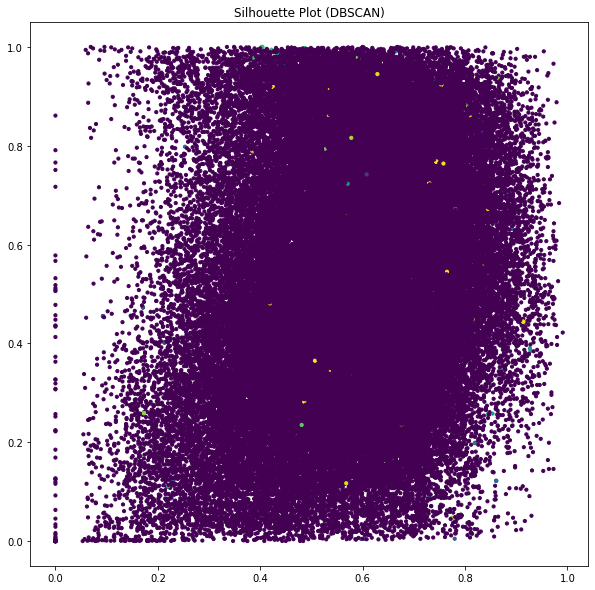

In [21]:
for eps in [1.5, 2.0, 3.0, 5.0]:
    dbscan = DBSCAN(eps=1.5, min_samples=3)
    labels = dbscan.fit_predict(X)

    df_scaled['dbscan_cluster'] = labels

    # Count clusters
    n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
    print(f"DBSCAN found {n_clusters} clusters (with -1 = noise).")

    if n_clusters > 1:
        score = silhouette_score(X, labels)
        print("Silhouette Score (DBSCAN):", score)
        plt.figure(figsize=(10, 10))
        # plt.scatter(X[:, 0], X[:, 1], c=labels, s=10)
        plt.scatter(X.iloc[:, 0], X.iloc[:, 1], c=labels, s=10)

        plt.title("Silhouette Plot (DBSCAN)")
        plt.show()



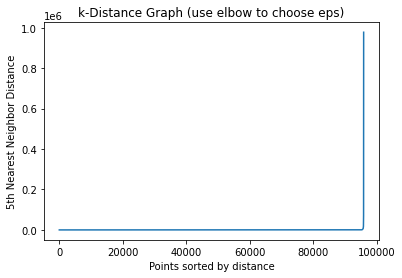

In [22]:
# Compute nearest neighbors
neigh = NearestNeighbors(n_neighbors=5)
nbrs = neigh.fit(X)
distances, indices = nbrs.kneighbors(X)

# Sort distances
distances = np.sort(distances[:, 4])
plt.plot(distances)
plt.title("k-Distance Graph (use elbow to choose eps)")
plt.xlabel("Points sorted by distance")
plt.ylabel("5th Nearest Neighbor Distance")
plt.show()


In [23]:
db = DBSCAN(eps=0.5, min_samples=10).fit(X)
labels = db.labels_

n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
print(f"DBSCAN found {n_clusters} clusters (with -1 = noise).")
score = silhouette_score(X, labels)
print("Silhouette Score (DBSCAN):", score)


DBSCAN found 5 clusters (with -1 = noise).
Silhouette Score (DBSCAN): -0.7209196941681676


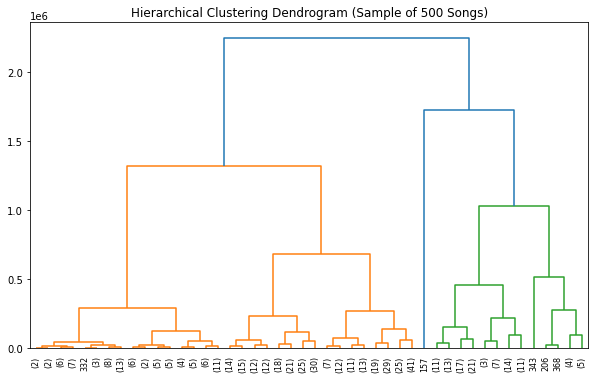

In [24]:
# Sample subset (e.g., 500 rows)
sample_idx = np.random.choice(len(X), size=500,  replace=False)
X_sample = X.iloc[sample_idx]

# Dendrogram on sample
linked = linkage(X_sample, method='ward')
plt.figure(figsize=(10,6))
dendrogram(linked, truncate_mode='level', p=5)
plt.title("Hierarchical Clustering Dendrogram (Sample of 500 Songs)")
plt.show()


In [25]:
sample_idx = np.random.choice(len(X), size=1000, replace=False)
X_sample = X.iloc[sample_idx]

agg = AgglomerativeClustering(n_clusters=6, linkage='ward')
df_scaled.loc[sample_idx, 'agg_cluster'] = agg.fit_predict(X_sample)


In [26]:
df_scaled

,id_songs,name_song,popularity_songs,duration_ms,explicit,id_artists,release_date,danceability,energy,key,...,time_signature,followers,genres,name_artists,popularity_artists,cluster,pca1,pca2,dbscan_cluster,agg_cluster
0,0IA0Hju8CAgYfV1hwhidBH,La Java,0,161427,0,4AxgXfD7ISvJSTObqm4aIE,1922,0.563,0.1840,4,...,3,5078.0,['vintage chanson'],Mistinguett,22,3,-47305.031545,16.334663,-1,NaN
1,1b8HZQCqcqwbzlA1jRTp6E,En Douce,0,223440,0,4AxgXfD7ISvJSTObqm4aIE,1922,0.427,0.1800,10,...,3,5078.0,['vintage chanson'],Mistinguett,22,3,14707.967401,-39.500647,-1,NaN
2,5d5gQxHwYovxR5pqETOIAa,J'en Ai Marre,0,208267,0,4AxgXfD7ISvJSTObqm4aIE,1922,0.511,0.2060,0,...,4,5078.0,['vintage chanson'],Mistinguett,22,3,-465.032749,-47.227932,-1,NaN
3,1EO65UEEPfy7CR0NK2sDxy,Ils n'ont pas ca,0,161933,0,4AxgXfD7ISvJSTObqm4aIE,1924,0.676,0.4670,9,...,4,5078.0,['vintage chanson'],Mistinguett,22,3,-46799.031603,13.054487,-1,NaN
4,6a58gXSgqbIsXUhVZ6ZJqe,La belote,0,167973,0,4AxgXfD7ISvJSTObqm4aIE,1924,0.650,0.2980,9,...,4,5078.0,['vintage chanson'],Mistinguett,22,3,-40759.032630,-40.903772,-1,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95832,44r4zta6P9flkhKaVnbsvG,Freaks,70,174800,0,14Y3trk7LaslSFTk1G35rx,2019-02-25,0.674,0.5680,1,...,4,16057.0,['alt z'],Jordan Clarke,56,3,-33932.030893,49.306619,-1,NaN
95833,0MmaEacabpK8Yp3Mdeo5uY,下雨天,50,265846,0,5VGgFE9nPgMfEnYiPT5J2B,2020-02-25,0.528,0.6730,4,...,4,929.0,['chinese viral pop'],芝麻,36,3,57113.968416,11.626392,-1,NaN
95834,1dKxf4Ht2SsKLyXfSDJAgy,The Cutest Puppy,67,82500,0,7vgGpuiXdNlCmc994PlMlz,2020-10-30,0.609,0.0172,8,...,4,23.0,['instrumental lullaby'],Laureen Conrad,52,0,-126232.032809,-47.041797,-1,NaN
95835,0SjsIzJkZfDU7wlcdklEFR,John Brown's Song,66,185250,0,4MxqhahGRT4BPz1PilXGeu,2020-03-20,0.562,0.0331,1,...,3,91.0,['instrumental lullaby'],Gregory Oberle,55,3,-23482.032910,-53.832427,-1,NaN


In [27]:
score = silhouette_score(X, df_scaled['cluster'])
print("Silhouette Score:", score)

Silhouette Score: 0.547992879111175


In [28]:
from sklearn.metrics import davies_bouldin_score

db_index = davies_bouldin_score(X, df_scaled['cluster'])
print("Davies-Bouldin Index:", db_index)


Davies-Bouldin Index: 0.5105923671588558


In [29]:
print("Inertia (KMeans):", kmeans.inertia_)


Inertia (KMeans): 208524651506749.56


In [30]:
cluster_summary = df_scaled.groupby("cluster")[features].mean().round(2)
print(cluster_summary)


         danceability  energy  loudness  speechiness  acousticness  \
cluster                                                              
0                0.62    0.47    -12.16         0.44          0.57   
1                0.55    0.57     -9.72         0.08          0.38   
2                0.51    0.41    -15.38         0.44          0.66   
3                0.58    0.56     -9.37         0.07          0.43   
4                0.43    0.62    -13.43         0.23          0.36   

         instrumentalness  liveness  valence   tempo  duration_ms  
cluster                                                            
0                    0.08      0.31     0.61  110.08    104345.60  
1                    0.12      0.20     0.49  120.07    334848.06  
2                    0.17      0.38     0.42  104.48   1273969.11  
3                    0.07      0.19     0.58  120.20    213686.75  
4                    0.34      0.33     0.25  114.06   3349307.12  


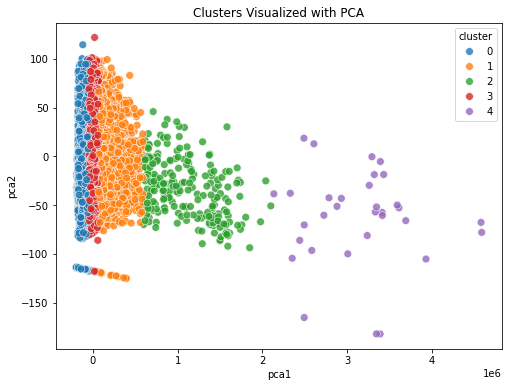

In [31]:
pca = PCA(n_components=2)
pca_result = pca.fit_transform(X)
df_scaled['pca1'] = pca_result[:, 0]
df_scaled['pca2'] = pca_result[:, 1]

plt.figure(figsize=(8,6))
sns.scatterplot(
    x="pca1", y="pca2",
    hue="cluster", data=df_scaled,
    palette="tab10", s=60, alpha=0.8
)
plt.title("Clusters Visualized with PCA")
plt.show()


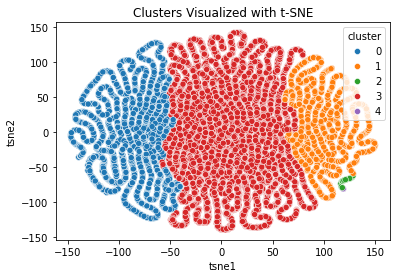

In [32]:


tsne = TSNE(n_components=2, random_state=42, perplexity=30)
tsne_result = tsne.fit_transform(X)
df_scaled['tsne1'] = tsne_result[:, 0]
df_scaled['tsne2'] = tsne_result[:, 1]

sns.scatterplot(x="tsne1", y="tsne2", hue="cluster", data=df_scaled, palette="tab10")
plt.title("Clusters Visualized with t-SNE")
plt.show()


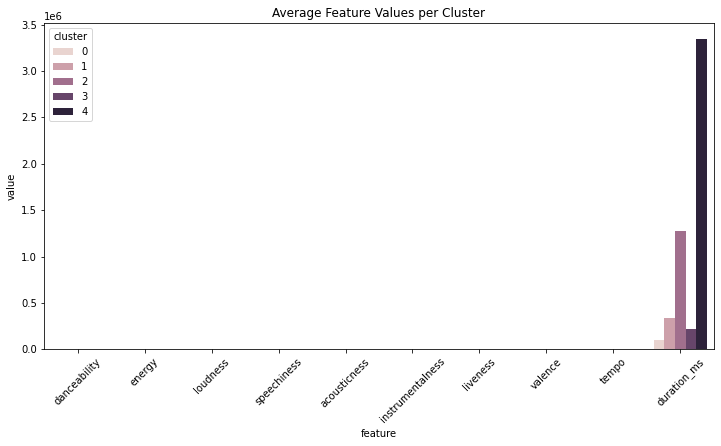

In [33]:
cluster_summary = df_scaled.groupby("cluster")[features].mean().reset_index()
cluster_summary_melt = cluster_summary.melt(id_vars="cluster", var_name="feature", value_name="value")

plt.figure(figsize=(12,6))
sns.barplot(x="feature", y="value", hue="cluster", data=cluster_summary_melt)
plt.xticks(rotation=45)
plt.title("Average Feature Values per Cluster")
plt.show()


<Axes: xlabel='danceability', ylabel='Density'>

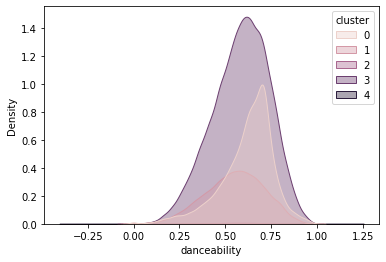

In [34]:
sns.kdeplot(data=df_scaled, x="danceability", hue="cluster", fill=True, alpha=0.4)


<Axes: xlabel='duration_log', ylabel='Density'>

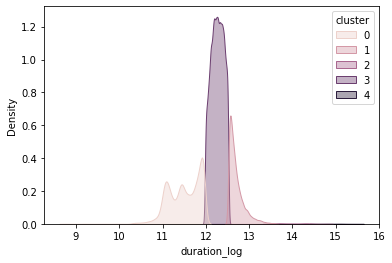

In [35]:
import numpy as np
df_scaled['duration_log'] = np.log1p(df_scaled['duration_ms'])
sns.kdeplot(data=df_scaled, x="duration_log", hue="cluster", fill=True, alpha=0.4)


/tmp/ipykernel_494/3176466236.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x="cluster", y="danceability", data=df_scaled, palette="tab10")


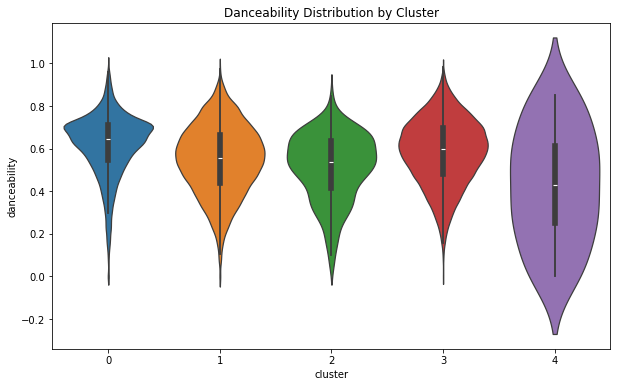

In [36]:
plt.figure(figsize=(10,6))
sns.violinplot(x="cluster", y="danceability", data=df_scaled, palette="tab10")
plt.title("Danceability Distribution by Cluster")
plt.show()


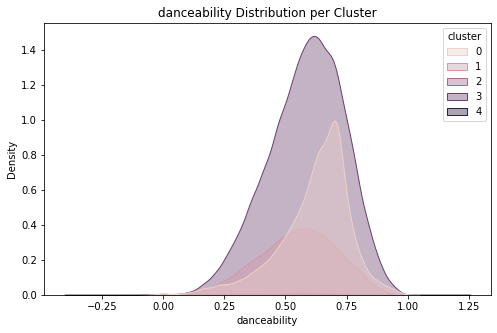

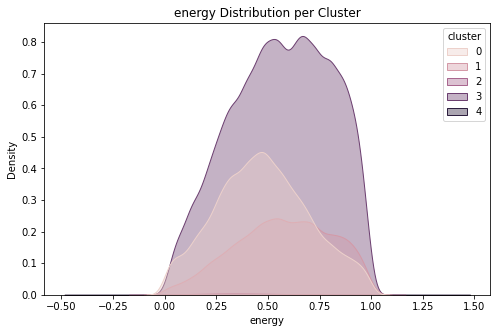

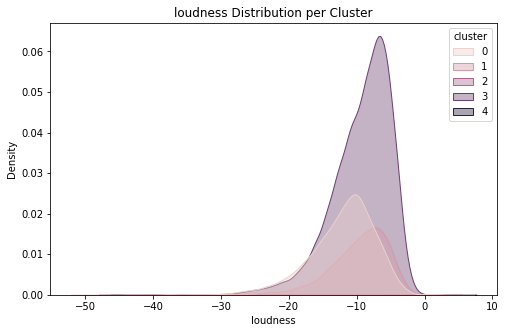

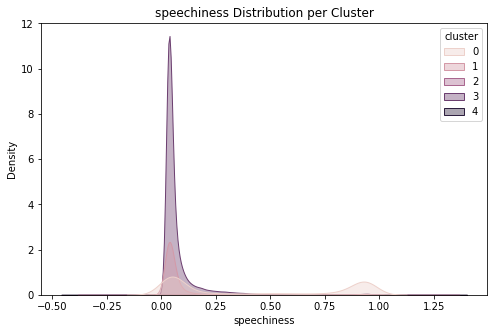

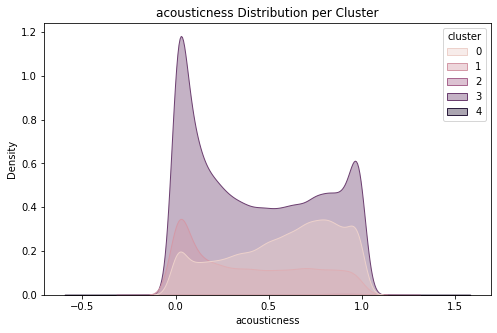

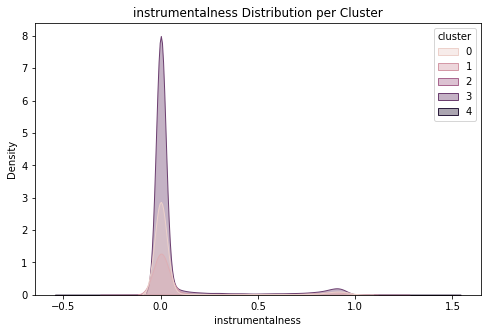

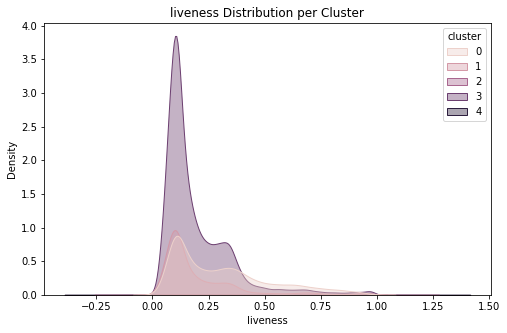

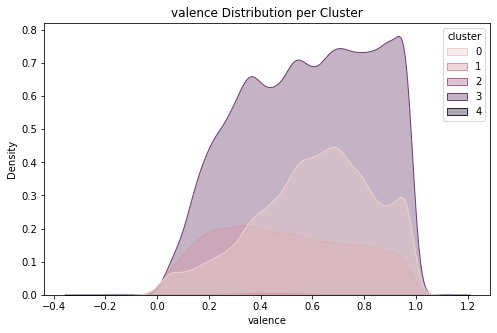

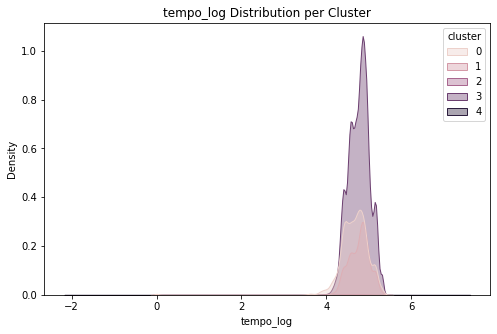

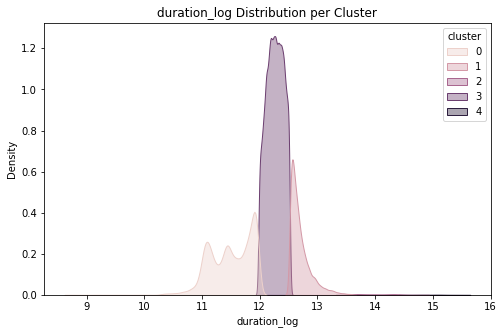

In [37]:
features_to_plot = [
    'danceability', 'energy', 'loudness', 'speechiness',
    'acousticness', 'instrumentalness', 'liveness',
    'valence', 'tempo', 'duration_ms'
]

df_scaled['duration_log'] = np.log1p(df_scaled['duration_ms'])
df_scaled['tempo_log'] = np.log1p(df_scaled['tempo'])

plot_features = [
    'danceability', 'energy', 'loudness', 'speechiness',
    'acousticness', 'instrumentalness', 'liveness',
    'valence', 'tempo_log', 'duration_log'
]


for feature in plot_features:
    plt.figure(figsize=(8,5))
    sns.kdeplot(data=df_scaled, x=feature, hue="cluster", fill=True, alpha=0.4)
    plt.title(f"{feature} Distribution per Cluster")
    plt.show()


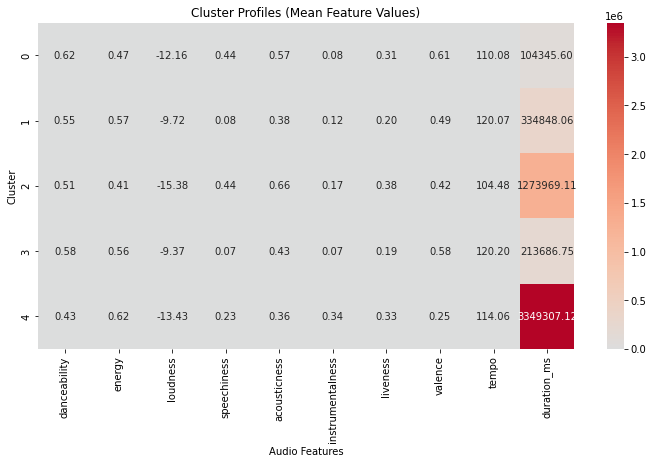

In [38]:
import seaborn as sns
import matplotlib.pyplot as plt

cluster_summary = df_scaled.groupby("cluster")[features].mean()

plt.figure(figsize=(12,6))
sns.heatmap(cluster_summary, annot=True, fmt=".2f", cmap="coolwarm", center=0)
plt.title("Cluster Profiles (Mean Feature Values)")
plt.xlabel("Audio Features")
plt.ylabel("Cluster")
plt.show()


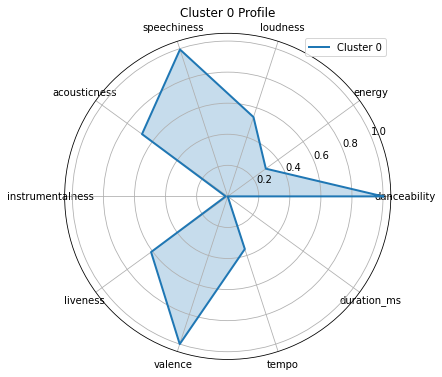

In [39]:
import numpy as np
import matplotlib.pyplot as plt

features = [
    'danceability', 'energy', 'loudness', 'speechiness',
    'acousticness', 'instrumentalness', 'liveness',
    'valence', 'tempo', 'duration_ms'
]


norm_summary = (cluster_summary - cluster_summary.min()) / (cluster_summary.max() - cluster_summary.min())

def plot_radar(cluster_id):
    values = norm_summary.iloc[cluster_id].values.flatten().tolist()
    values += values[:1]  
    categories = features
    N = len(categories)

    angles = np.linspace(0, 2*np.pi, N, endpoint=False).tolist()
    angles += angles[:1]

    fig, ax = plt.subplots(figsize=(6,6), subplot_kw=dict(polar=True))
    ax.plot(angles, values, linewidth=2, label=f"Cluster {cluster_id}")
    ax.fill(angles, values, alpha=0.25)
    ax.set_thetagrids(np.degrees(angles[:-1]), categories)

    plt.title(f"Cluster {cluster_id} Profile")
    plt.legend(loc="upper right")
    plt.show()


plot_radar(0)


In [40]:
norm_summary

,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
cluster,,,,,,,,,,
0,1.000000,0.303409,0.536934,0.994488,0.682121,0.013100,0.609930,1.000000,0.356467,0.000000
1,0.638311,0.782316,0.942402,0.005518,0.053207,0.161444,0.036128,0.677120,0.991443,0.071034
2,0.449708,0.000000,0.000000,1.000000,1.000000,0.364290,1.000000,0.485535,0.000000,0.360443
3,0.820093,0.731509,1.000000,0.000000,0.221680,0.000000,0.000000,0.932998,1.000000,0.033696
4,0.000000,1.000000,0.324332,0.422353,0.000000,1.000000,0.738150,0.000000,0.609068,1.000000


In [41]:
df_scaled

,id_songs,name_song,popularity_songs,duration_ms,explicit,id_artists,release_date,danceability,energy,key,...,popularity_artists,cluster,pca1,pca2,dbscan_cluster,agg_cluster,tsne1,tsne2,duration_log,tempo_log
0,0IA0Hju8CAgYfV1hwhidBH,La Java,0,161427,0,4AxgXfD7ISvJSTObqm4aIE,1922,0.563,0.1840,4,...,22,3,-47305.031545,16.334663,-1,NaN,-40.920364,94.056152,11.991815,4.898496
1,1b8HZQCqcqwbzlA1jRTp6E,En Douce,0,223440,0,4AxgXfD7ISvJSTObqm4aIE,1922,0.427,0.1800,10,...,22,3,14707.967401,-39.500647,-1,NaN,29.169207,13.800084,12.316903,4.375241
2,5d5gQxHwYovxR5pqETOIAa,J'en Ai Marre,0,208267,0,4AxgXfD7ISvJSTObqm4aIE,1922,0.511,0.2060,0,...,22,3,-465.032749,-47.227932,-1,NaN,2.774376,8.057876,12.246581,4.268900
3,1EO65UEEPfy7CR0NK2sDxy,Ils n'ont pas ca,0,161933,0,4AxgXfD7ISvJSTObqm4aIE,1924,0.676,0.4670,9,...,22,3,-46799.031603,13.054487,-1,NaN,-33.751606,82.219147,11.994944,4.873478
4,6a58gXSgqbIsXUhVZ6ZJqe,La belote,0,167973,0,4AxgXfD7ISvJSTObqm4aIE,1924,0.650,0.2980,9,...,22,3,-40759.032630,-40.903772,-1,NaN,-45.587803,-58.084435,12.031564,4.343156
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95832,44r4zta6P9flkhKaVnbsvG,Freaks,70,174800,0,14Y3trk7LaslSFTk1G35rx,2019-02-25,0.674,0.5680,1,...,56,3,-33932.030893,49.306619,-1,NaN,-44.585136,-35.835152,12.071403,5.118634
95833,0MmaEacabpK8Yp3Mdeo5uY,下雨天,50,265846,0,5VGgFE9nPgMfEnYiPT5J2B,2020-02-25,0.528,0.6730,4,...,36,3,57113.968416,11.626392,-1,NaN,68.776497,-55.855347,12.490676,4.875701
95834,1dKxf4Ht2SsKLyXfSDJAgy,The Cutest Puppy,67,82500,0,7vgGpuiXdNlCmc994PlMlz,2020-10-30,0.609,0.0172,8,...,52,0,-126232.032809,-47.041797,-1,NaN,-105.404518,78.291862,11.320566,4.243038
95835,0SjsIzJkZfDU7wlcdklEFR,John Brown's Song,66,185250,0,4MxqhahGRT4BPz1PilXGeu,2020-03-20,0.562,0.0331,1,...,55,3,-23482.032910,-53.832427,-1,NaN,-9.773463,-1.823296,12.129467,4.169699


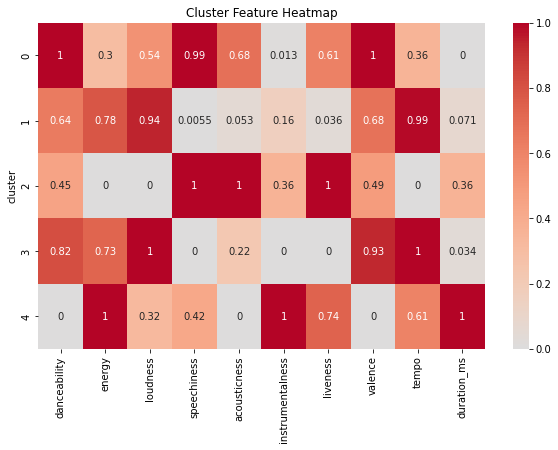

In [42]:
plt.figure(figsize=(10,6))
sns.heatmap(
    norm_summary.reset_index().set_index("cluster"), 
    annot=True, cmap="coolwarm", center=0
)
plt.title("Cluster Feature Heatmap")
plt.show()


In [43]:
# Add cluster labels to the original DataFrame
df_final = df.copy()
df_final['cluster'] = kmeans.labels_   # or dbscan.labels_


In [44]:
df_final['cluster'].unique()

array([3, 0, 2, 1, 4], dtype=int32)

In [45]:
# Show top 5 tracks from each cluster (example)
for i in df_final['cluster'].unique():
    print(f"\n🎵 Cluster {i}")
    display(df_final[df_final['cluster'] == i].head(5))



🎵 Cluster 3


,id_songs,name_song,popularity_songs,duration_ms,explicit,id_artists,release_date,danceability,energy,key,...,instrumentalness,liveness,valence,tempo,time_signature,followers,genres,name_artists,popularity_artists,cluster
0,0IA0Hju8CAgYfV1hwhidBH,La Java,0,161427,0,4AxgXfD7ISvJSTObqm4aIE,1922,0.563,0.184,4,...,0.000016,0.325,0.654,133.088,3,5078.0,['vintage chanson'],Mistinguett,22,3
1,1b8HZQCqcqwbzlA1jRTp6E,En Douce,0,223440,0,4AxgXfD7ISvJSTObqm4aIE,1922,0.427,0.180,10,...,0.000000,0.128,0.431,78.459,3,5078.0,['vintage chanson'],Mistinguett,22,3
2,5d5gQxHwYovxR5pqETOIAa,J'en Ai Marre,0,208267,0,4AxgXfD7ISvJSTObqm4aIE,1922,0.511,0.206,0,...,0.000000,0.418,0.481,70.443,4,5078.0,['vintage chanson'],Mistinguett,22,3
3,1EO65UEEPfy7CR0NK2sDxy,Ils n'ont pas ca,0,161933,0,4AxgXfD7ISvJSTObqm4aIE,1924,0.676,0.467,9,...,0.000000,0.219,0.726,129.775,4,5078.0,['vintage chanson'],Mistinguett,22,3
4,6a58gXSgqbIsXUhVZ6ZJqe,La belote,0,167973,0,4AxgXfD7ISvJSTObqm4aIE,1924,0.650,0.298,9,...,0.000000,0.373,0.844,75.950,4,5078.0,['vintage chanson'],Mistinguett,22,3



🎵 Cluster 0


,id_songs,name_song,popularity_songs,duration_ms,explicit,id_artists,release_date,danceability,energy,key,...,instrumentalness,liveness,valence,tempo,time_signature,followers,genres,name_artists,popularity_artists,cluster
5,6sVxCBvLSd9PZA7prJn53O,Oh mademoiselle,0,158693,0,4AxgXfD7ISvJSTObqm4aIE,1924,0.671,0.454,10,...,0.000000,0.318,0.852,121.611,4,5078.0,['vintage chanson'],Mistinguett,22,0
9,3k4N13FLmeIcETs5zwxnvd,Le Fado,0,154733,0,4AxgXfD7ISvJSTObqm4aIE,1926,0.537,0.383,1,...,0.000004,0.144,0.639,136.825,4,5078.0,['vintage chanson'],Mistinguett,22,0
15,3JXqcCMCG5fmd3TULURKkN,On M'suit,0,140867,0,4AxgXfD7ISvJSTObqm4aIE,1928,0.760,0.366,2,...,0.000000,0.407,0.846,129.074,4,5078.0,['vintage chanson'],Mistinguett,22,0
19,0xm39QlrWy3ZZsCb7dP6c4,C'est Tout C'que J'ai,0,150047,0,4AxgXfD7ISvJSTObqm4aIE,1929,0.637,0.184,7,...,0.000000,0.321,0.633,92.062,4,5078.0,['vintage chanson'],Mistinguett,22,0
20,6qviDivTUtbGkIpA43sfx1,Rita,0,145914,0,4AxgXfD7ISvJSTObqm4aIE,1929,0.646,0.376,0,...,0.000000,0.165,0.874,78.611,3,5078.0,['vintage chanson'],Mistinguett,22,0



🎵 Cluster 2


,id_songs,name_song,popularity_songs,duration_ms,explicit,id_artists,release_date,danceability,energy,key,...,instrumentalness,liveness,valence,tempo,time_signature,followers,genres,name_artists,popularity_artists,cluster
426,0lATdfQAizjfZqZdTdcbGp,Hella Often Freestyle,0,822857,0,5OJ9jD6lY1mFZf48h5WLBK,1925-11-12,0.678,0.835,0,...,0.00441,0.148,0.162,140.005,4,480.0,['portland hip hop'],Old Grape God,26,2
1586,1H1NFtQv2HFhg7DTNgEf1a,The Boxing Match,3,824208,0,6AmG7SNdlV9boPZ7dFVnLY,1931,0.450,0.316,8,...,0.76400,0.360,0.455,125.330,4,16379.0,['classic soundtrack'],Charlie Chaplin,40,2
1599,5sqm8MBMpfAT0njgL66aJd,The Boxing Match,0,824208,0,6AmG7SNdlV9boPZ7dFVnLY,1931,0.450,0.316,8,...,0.76400,0.360,0.455,125.330,4,16379.0,['classic soundtrack'],Charlie Chaplin,40,2
1684,5RumlRQ92Z3WyEHDv8VZgB,The Boxing Match,1,824208,0,6AmG7SNdlV9boPZ7dFVnLY,1931,0.450,0.316,8,...,0.76400,0.360,0.455,125.330,4,16379.0,['classic soundtrack'],Charlie Chaplin,40,2
1740,7kDvHsQr9ffznQvug9wQqR,The Boxing Match,0,824208,0,6AmG7SNdlV9boPZ7dFVnLY,1931,0.450,0.316,8,...,0.76400,0.360,0.455,125.330,4,16379.0,['classic soundtrack'],Charlie Chaplin,40,2



🎵 Cluster 1


,id_songs,name_song,popularity_songs,duration_ms,explicit,id_artists,release_date,danceability,energy,key,...,instrumentalness,liveness,valence,tempo,time_signature,followers,genres,name_artists,popularity_artists,cluster
534,6Z7y81CfJYNVGyJ2zGuR1B,Prière De La Charlotte,1,371027,0,39Pvy9yN3uoC3b2S0nI0IN,1934,0.445,0.195,4,...,0.000005,0.3740,0.350,85.405,4,328.0,['vintage chanson'],Marie Dubas,6,1
566,0CMwjOGDMyMswJeTpiP8bH,Mi Ángel de la Madrugá,28,296217,0,4dUGRne0PUE9Gqx9O7q5UA,1927,0.358,0.365,0,...,0.711000,0.1070,0.280,165.790,3,1431.0,['cornetas y tambores'],Agrupación Musical Nuestro Padre Jesús de la S...,30,1
568,2wX2GB9JRVCl891NekMUzq,Al pasar por Dueñas,19,295328,0,4dUGRne0PUE9Gqx9O7q5UA,1927,0.465,0.372,5,...,0.932000,0.1070,0.288,73.192,4,1431.0,['cornetas y tambores'],Agrupación Musical Nuestro Padre Jesús de la S...,30,1
572,6N1bnZ0MGEbcO2m2Txncgf,Señor de la Caridad,13,279341,0,4dUGRne0PUE9Gqx9O7q5UA,1927,0.529,0.355,0,...,0.910000,0.0705,0.438,78.309,4,1431.0,['cornetas y tambores'],Agrupación Musical Nuestro Padre Jesús de la S...,30,1
575,3EIOxSOVwIdXl2BJBvOfPd,Su Concierto (Himno a Don Bosco),12,296870,0,4dUGRne0PUE9Gqx9O7q5UA,1927,0.491,0.305,0,...,0.900000,0.0850,0.693,77.293,4,1431.0,['cornetas y tambores'],Agrupación Musical Nuestro Padre Jesús de la S...,30,1



🎵 Cluster 4


,id_songs,name_song,popularity_songs,duration_ms,explicit,id_artists,release_date,danceability,energy,key,...,instrumentalness,liveness,valence,tempo,time_signature,followers,genres,name_artists,popularity_artists,cluster
2103,22EUED6I5Hh5knWDTdVn82,Address to Congress on Yalta - 03 01 1945,0,3091373,0,2VbVSopwIwwjy7GZkEztrv,1944-06-05,0.656,0.356,6,...,0.00151,0.6940,0.420,121.304,3,461.0,['oratory'],Franklin Delano Roosevelt,4,4
33446,6aFQ4Zu4dvTfWFbXVHifcD,"Robsoul 15 Years, Vol. 3 (2010-2014) - Continu...",0,3903324,0,0ruxrxTRHzfO8KsLLNPNkK,2014-09-05,0.852,0.788,10,...,0.45100,0.1210,0.386,122.013,4,9040.0,['minimal tech house'],Phil Weeks,33,4
33455,28ci4OQnXnVyOJJjqNTza1,6 Years of 1980 Recordings - Part 2 - 2010-201...,0,4800118,0,5x6OZlUVGFX4F1QHJCgysn,2013-01-28,0.751,0.807,7,...,0.51900,0.1020,0.190,127.006,4,2924.0,['musica andorra'],Dan McKie,32,4
33739,3IG9msuvoyDjJlt2DL0ZIn,Monster Tunes Yearmix 2011 - Mixed by Mark Eteson,0,4792587,0,6vwohTnFjRH2dQCZd32eSB,2011-12-19,0.317,0.914,11,...,0.54600,0.1290,0.108,137.075,4,1655.0,['progressive house'],Mark Eteson,23,4
33740,641MdvIX8xj0XXnx05sJKM,Monster Tunes Yearmix 2013 - Contiunous DJ Mix 1,1,3822752,0,6vwohTnFjRH2dQCZd32eSB,2013-12-30,0.451,0.906,6,...,0.25700,0.0997,0.164,133.460,4,1655.0,['progressive house'],Mark Eteson,23,4


In [46]:
cluster_summary = df_final.groupby('cluster')[
    ['danceability', 'energy', 'loudness', 'speechiness',
     'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo', 'duration_ms']
].mean().round(2)

print(cluster_summary)


         danceability  energy  loudness  speechiness  acousticness  \
cluster                                                              
0                0.62    0.47    -12.16         0.44          0.57   
1                0.55    0.57     -9.72         0.08          0.38   
2                0.51    0.41    -15.38         0.44          0.66   
3                0.58    0.56     -9.37         0.07          0.43   
4                0.43    0.62    -13.43         0.23          0.36   

         instrumentalness  liveness  valence   tempo  duration_ms  
cluster                                                            
0                    0.08      0.31     0.61  110.08    104345.60  
1                    0.12      0.20     0.49  120.07    334848.06  
2                    0.17      0.38     0.42  104.48   1273969.11  
3                    0.07      0.19     0.58  120.20    213686.75  
4                    0.34      0.33     0.25  114.06   3349307.12  


In [47]:
df_final.to_csv("clustered_songs_final.csv", index=False)
print("Final dataset exported as clustered_songs_final.csv")


Final dataset exported as clustered_songs_final.csv


In [48]:
with open("cluster_summary.txt", "w") as f:
    f.write("MUSIC CLUSTERING REPORT\n\n")
    f.write(str(cluster_summary))
    f.write("\n\nCluster Insights:\n")
    f.write("Cluster 0: Party & energetic tracks\n")
    f.write("Cluster 1: Calm acoustic or chill music\n")
    f.write("Cluster 2: Rap/hip-hop style speechiness\n")
    f.write("Cluster 3: Instrumental and ambient songs\n")
    f.write("Cluster 4: Balanced pop/feel-good songs\n")
